In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer

In [2]:
datos = pd.read_csv(
    'https://docs.google.com/spreadsheets/d/1wduqo5WyYmCpaGnE81sLNGU0VSodIekMfpmEwU0fGqs/export?format=csv', low_memory=False
)

resultados = pd.read_csv(
    'https://docs.google.com/spreadsheets/d/1gvZ03uAL6THwd04Y98GtIj6SeAHiKyQY5UisuuyFSUs/export?format=csv', low_memory=False
)

df = pd.merge(datos, resultados, how='left', left_on='id', right_on='id')
df

,barrio,dia,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,id,llovieron_hamburguesas_hoy,mm_evaporados_agua,...,presion_atmosferica_temprano,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viendo_tarde,velocidad_viendo_temprano,llovieron_hamburguesas_al_dia_siguiente
0,Retiro,2016-10-11,Este,Nornoreste,10.7,59.0,56.0,86942,no,16.0,...,1010.2,Estesureste,33.0,29.2,16.8,24.1,25.3,19.0,4.0,no
1,Vélez Sársfield,2016-03-28,Sur,suroeste,0.0,49.0,83.0,102098,no,2.6,...,1021.4,Sur,31.0,16.9,10.6,16.4,12.3,13.0,7.0,no
2,Palermo,2017-05-11,Sursureste,Norte,4.3,59.0,83.0,67154,no,2.4,...,1026.5,Norte,26.0,16.6,4.4,15.7,9.4,9.0,13.0,no
3,Mataderos,2012-05-07,suroeste,Sur,NaN,67.0,93.0,50245,no,NaN,...,1020.0,Oestesuroeste,13.0,11.4,0.8,11.1,4.0,6.0,6.0,no
4,Recoleta,2014-06-19,Nornoreste,Nornoreste,0.8,94.0,97.0,82904,no,0.8,...,1021.9,Nornoreste,33.0,11.6,6.7,11.2,8.8,11.0,15.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116363,Villa Lugano,2011-03-07,Oestesuroeste,Sureste,11.6,35.0,44.0,118424,no,8.4,...,1015.9,suroeste,43.0,28.7,17.4,27.8,23.0,30.0,11.0,no
116364,Saavedra,2009-07-25,Sureste,Sursureste,1.0,68.0,80.0,87436,no,7.4,...,1018.2,Sureste,44.0,26.3,19.0,24.0,21.9,30.0,19.0,si
116365,Villa General Mitre,2013-11-11,suroeste,Sur,11.1,19.0,43.0,116306,no,NaN,...,1014.4,Oestesuroeste,35.0,34.5,10.2,32.8,24.2,24.0,9.0,no
116366,Villa Devoto,2010-08-17,Sursuroeste,NaN,NaN,71.0,99.0,112204,no,NaN,...,1005.2,Sursuroeste,43.0,16.5,5.0,13.6,11.4,26.0,0.0,si


In [3]:
from sklearn.model_selection import train_test_split

df = df.dropna(subset=['llovieron_hamburguesas_al_dia_siguiente'])
datos_1 = df.iloc[:, :23]
resultados_1 = df.iloc[:,23:]

X_training_val_dev, X_test_holdout, y_training_val_dev, y_test_holdout = train_test_split(
    datos_1, resultados_1, random_state=117, test_size=0.1, stratify=resultados_1
)
X_training, X_val_dev, y_training, y_val_dev = train_test_split(
    X_training_val_dev, y_training_val_dev, random_state=117, test_size=0.3, stratify=y_training_val_dev
)


print("Shape of new dataframes - {} , {}".format(X_training.shape, y_training.shape))
datos_training = X_training.copy()
datos_test_holdout = X_test_holdout.copy()
datos_training

Shape of new dataframes - (71649, 23) , (71649, 1)


,barrio,dia,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,id,llovieron_hamburguesas_hoy,mm_evaporados_agua,...,presion_atmosferica_tarde,presion_atmosferica_temprano,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viendo_tarde,velocidad_viendo_temprano
98355,La Paternal,2014-06-12,Nornoreste,Oestenoroeste,NaN,59.0,69.0,44477,no,NaN,...,1018.7,1021.3,Noroeste,28.0,19.3,12.0,18.8,14.8,15.0,9.0
25931,Villa Soldati,2013-11-11,Oestenoroeste,Oestesuroeste,5.8,62.0,67.0,140981,no,6.4,...,1005.0,1008.5,Este,72.0,33.8,26.0,32.5,30.0,28.0,13.0
19830,Saavedra,2012-11-19,Norte,Sursureste,7.2,71.0,75.0,88619,no,5.2,...,1008.8,1011.2,Estenoreste,35.0,33.1,23.7,28.1,27.1,15.0,6.0
100102,San Cristóbal,2009-02-05,Sureste,Sursureste,NaN,62.0,63.0,90306,no,NaN,...,1007.8,1009.0,Sureste,39.0,30.4,23.3,28.8,28.6,31.0,26.0
77366,Núñez,2016-06-26,Noroeste,Noroeste,NaN,61.0,84.0,63826,no,NaN,...,1016.6,1020.8,Oeste,30.0,12.8,3.3,12.3,6.3,11.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26036,Almagro,2014-01-14,Nornoreste,Norte,NaN,33.0,62.0,4790,no,NaN,...,1018.1,1022.1,Estenoreste,35.0,33.9,14.7,32.2,22.4,13.0,13.0
20182,Agronomía,2012-08-21,Noreste,Sureste,NaN,45.0,84.0,1329,no,NaN,...,1015.3,1020.1,Norte,33.0,16.4,2.1,15.6,7.9,19.0,7.0
2036,Parque Patricios,2012-06-05,Sureste,Sursureste,0.9,66.0,63.0,76201,si,0.6,...,1020.6,1019.7,Sureste,59.0,12.6,10.7,12.0,11.6,31.0,30.0
12108,La Paternal,2014-07-30,Oestenoroeste,Noroeste,NaN,34.0,47.0,44525,NaN,NaN,...,1014.2,1017.1,Oestenoroeste,96.0,22.4,12.7,22.2,19.1,19.0,11.0


In [4]:
from preprocessing import preprocessing_mean

datos_training_tree, datos_val_dev = preprocessing_mean(datos_training, X_val_dev.copy())

y_training = y_training.reset_index()
y_training = y_training.drop(columns=['index'])
resultados_training_tree = pd.get_dummies(y_training, drop_first=True, columns=['llovieron_hamburguesas_al_dia_siguiente'])
resultados_val_dev = y_val_dev.reset_index().drop(columns=['index'])
resultados_val_dev = pd.get_dummies(resultados_val_dev, drop_first=True, columns=['llovieron_hamburguesas_al_dia_siguiente'])

datos_training_tree

,dia,horas_de_sol,humedad_tarde,humedad_temprano,mm_evaporados_agua,mm_lluvia_dia,nubosidad_tarde,nubosidad_temprano,presion_atmosferica_tarde,presion_atmosferica_temprano,...,direccion_viento_tarde_1,direccion_viento_tarde_2,direccion_viento_temprano_0,direccion_viento_temprano_1,direccion_viento_temprano_2,rafaga_viento_max_direccion_0,rafaga_viento_max_direccion_1,rafaga_viento_max_direccion_2,año,mes
0,12,7.644989,59.0,69.0,5.45772,0.000000,4.500233,4.437636,1018.700012,1021.3,...,6.0,-1.0,-5.0,8.0,0.0,-2.0,5.0,-1.0,2014,06
1,11,5.800000,62.0,67.0,6.40000,0.000000,3.000000,6.000000,1005.000000,1008.5,...,8.0,0.0,-5.0,8.0,0.0,-1.0,1.0,0.0,2013,11
2,19,7.200000,71.0,75.0,5.20000,1.000000,5.000000,5.000000,1008.799988,1011.2,...,3.0,-1.0,-4.0,6.0,0.0,-4.0,5.0,0.0,2012,11
3,05,7.644989,62.0,63.0,5.45772,0.000000,4.500233,4.437636,1007.799988,1009.0,...,4.0,0.0,-4.0,6.0,0.0,-3.0,4.0,0.0,2009,02
4,26,7.644989,61.0,84.0,5.45772,0.000000,4.500233,4.437636,1016.599976,1020.8,...,5.0,-1.0,-2.0,5.0,-1.0,-2.0,3.0,0.0,2016,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71644,14,7.644989,33.0,62.0,5.45772,0.000000,4.500233,4.437636,1018.099976,1022.1,...,6.0,-1.0,-1.0,3.0,-1.0,-4.0,5.0,0.0,2014,01
71645,21,7.644989,45.0,84.0,5.45772,0.000000,1.000000,2.000000,1015.299988,1020.1,...,4.0,-1.0,-3.0,4.0,0.0,-1.0,3.0,-1.0,2012,08
71646,05,0.900000,66.0,63.0,0.60000,11.800000,7.000000,8.000000,1020.599976,1019.7,...,4.0,0.0,-4.0,6.0,0.0,-3.0,4.0,0.0,2012,06
71647,30,7.644989,34.0,47.0,5.45772,2.367993,1.000000,4.437636,1014.200012,1017.1,...,8.0,0.0,-2.0,5.0,-1.0,-5.0,8.0,0.0,2014,07


# Entrenando con el dataset completo

Primero buscamos la combinacion de parametros a usar utilizando Random Search.

In [5]:
params = {'max_depth': np.arange(1, 21), 'min_samples_leaf': np.arange(1, 16)}

clf = DecisionTreeClassifier(random_state=117)

rgscv = RandomizedSearchCV(
    clf, params, n_iter=60, scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True, random_state=117
).fit(datos_training_tree, resultados_training_tree)
print(f"Best score: {rgscv.best_score_}")
print(f"Best params {rgscv.best_params_}")

Best score: 0.84750063594468
Best params {'min_samples_leaf': 6, 'max_depth': 8}


Una vez obtenidos los parametros entrenamos el arbol.

In [8]:
clf_tree = DecisionTreeClassifier(
        random_state=117, max_depth=8, min_samples_leaf=6)
clf_tree = clf_tree.fit(datos_training_tree, resultados_training_tree)

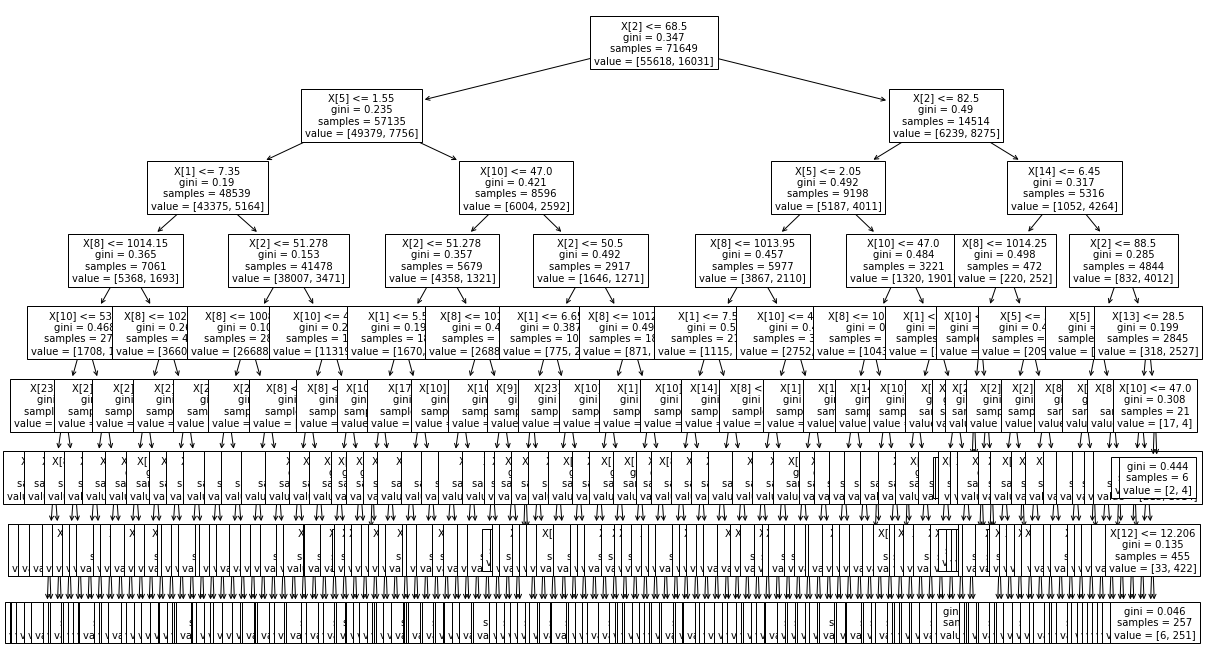

In [6]:
plt.figure(figsize=(20,12))  # set plot size (denoted in inches)
tree.plot_tree(clf_tree, fontsize=10)
plt.show()

Buscamos el accuracy del modelo utilizando kfold.

In [8]:
def kfold(clf, X, y):
  kf = StratifiedKFold(n_splits=5)
  test_accuracies = []
  for fold_idx, (train_index, test_index) in enumerate(kf.split(X,y)):
    clf.fit(X[train_index], y[train_index])
    test_accuracy = accuracy_score(y[test_index], clf.predict(X[test_index]))
    print(f"fold {fold_idx}: accuracy score is {test_accuracy:.4f}")
    test_accuracies.append(test_accuracy)
  print(f"mean test accuracy is: {np.mean(test_accuracies):.4f}")

In [5]:
clf_tree_kfold = DecisionTreeClassifier(
        max_depth=8, min_samples_leaf=6, random_state=117)

In [9]:
kfold(clf_tree_kfold, datos_training_tree.to_numpy(), resultados_training_tree.to_numpy())

fold 0: accuracy score is 0.8438
fold 1: accuracy score is 0.8378
fold 2: accuracy score is 0.8355
fold 3: accuracy score is 0.8342
fold 4: accuracy score is 0.8412
mean test accuracy is: 0.8385


Con el modelo entrenado predecimos sobre el validation.

In [8]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm)

    plt.figure(dpi=100)
    plt.title("Matriz de confusion")
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g', square=True)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

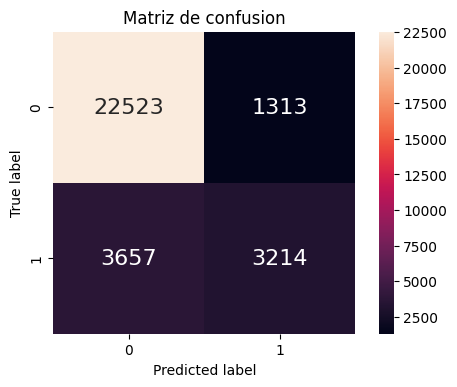

In [9]:
plot_confusion_matrix(resultados_val_dev, clf_tree.predict(datos_val_dev))

Vemos que el modelo es muy bueno para predecir cuando no va a llover (22523 de 23836), pero a su vez no es tan bueno prediciendo si va a llover (del total de la mitad las predijo mal).

In [10]:
print(classification_report(resultados_val_dev, clf_tree.predict(datos_val_dev)))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     23836
           1       0.71      0.47      0.56      6871

    accuracy                           0.84     30707
   macro avg       0.79      0.71      0.73     30707
weighted avg       0.83      0.84      0.83     30707



In [9]:
def plot_roc(_fpr, _tpr, x):

    roc_auc = auc(_fpr, _tpr)

    plt.figure(figsize=(15, 10))
    plt.plot(
        _fpr, _tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})'
    )
    plt.scatter(_fpr, x)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

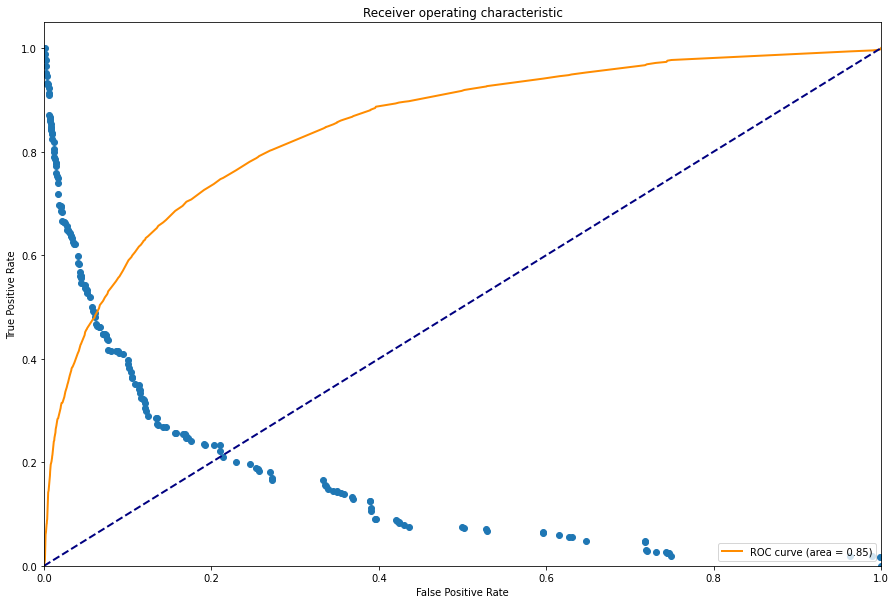

0.8461653101364149

In [12]:
fpr, tpr, thresholds = roc_curve(resultados_val_dev.to_numpy(), clf_tree.predict_proba(datos_val_dev)[:, 1])

plot_roc(fpr, tpr, thresholds)
display(roc_auc_score(resultados_val_dev.to_numpy(), clf_tree.predict_proba(datos_val_dev)[:, 1]))

A partir de los resultados vemos que tiene un recall para 'llovieron_hamburguesas_no' muy alto y un recall para 'llovieron_hamburguesas_si' muy bajo, por lo tanto su AUC ROC es de 0.846. Dado que es dificil mejorar la prediccion modificando los parametros para entrenar el modelo (los parametros fueron encontrados utilizando RandomSearch), entrenaremos el modelo rellenando el dataset utilizando imputers en lugar del promedio.

# Entrenando el modelo completando los NaN con IterativeImputer

In [13]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from preprocessing import preprocessing_

datos_training_rellenados_tree = preprocessing_(X_training.copy())
datos_val_rellenados_tree = preprocessing_(X_val_dev.copy())

imputer = IterativeImputer(random_state=117, max_iter=50)
imputer.fit(datos_training_rellenados_tree)
datos_training_rellenados_tree = imputer.transform(datos_training_rellenados_tree)
pd.DataFrame(datos_training_rellenados_tree)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,12.0,5.855419,59.0,69.0,3.547174,0.000000,4.662774,5.157845,1018.700012,1021.3,...,6.0,-1.0,-5.0,8.0,0.0,-2.0,5.0,-1.0,2014.0,6.0
1,11.0,5.800000,62.0,67.0,6.400000,0.000000,3.000000,6.000000,1005.000000,1008.5,...,8.0,0.0,-5.0,8.0,0.0,-1.0,1.0,0.0,2013.0,11.0
2,19.0,7.200000,71.0,75.0,5.200000,1.000000,5.000000,5.000000,1008.799988,1011.2,...,3.0,-1.0,-4.0,6.0,0.0,-4.0,5.0,0.0,2012.0,11.0
3,5.0,8.739483,62.0,63.0,7.652876,0.000000,4.447522,4.419859,1007.799988,1009.0,...,4.0,0.0,-4.0,6.0,0.0,-3.0,4.0,0.0,2009.0,2.0
4,26.0,4.483617,61.0,84.0,0.556286,0.000000,5.239149,5.182721,1016.599976,1020.8,...,5.0,-1.0,-2.0,5.0,-1.0,-2.0,3.0,0.0,2016.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71644,14.0,10.808036,33.0,62.0,7.109894,0.000000,2.859081,1.986983,1018.099976,1022.1,...,6.0,-1.0,-1.0,3.0,-1.0,-4.0,5.0,0.0,2014.0,1.0
71645,21.0,9.795808,45.0,84.0,1.206283,0.000000,1.000000,2.000000,1015.299988,1020.1,...,4.0,-1.0,-3.0,4.0,0.0,-1.0,3.0,-1.0,2012.0,8.0
71646,5.0,0.900000,66.0,63.0,0.600000,11.800000,7.000000,8.000000,1020.599976,1019.7,...,4.0,0.0,-4.0,6.0,0.0,-3.0,4.0,0.0,2012.0,6.0
71647,30.0,9.233298,34.0,47.0,7.346034,2.476756,1.000000,2.242586,1014.200012,1017.1,...,8.0,0.0,-2.0,5.0,-1.0,-5.0,8.0,0.0,2014.0,7.0


Buscamos los mejores parametros utilizando random search.

In [16]:
params = {'max_depth': np.arange(1, 21), 'min_samples_leaf': np.arange(1, 16)}

clf = DecisionTreeClassifier(random_state=117)

rgscv = RandomizedSearchCV(
    clf, params, n_iter=60, scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True, random_state=117
).fit(datos_training_rellenados_tree, resultados_training_tree)
print(f"Best score: {rgscv.best_score_}")
print(f"Best params {rgscv.best_params_}")

Best score: 0.8513765177130589
Best params {'min_samples_leaf': 14, 'max_depth': 7}


In [14]:
clf_tree_con_imputers = tree.DecisionTreeClassifier(
        random_state=117, max_depth=7, min_samples_leaf=14)

In [17]:
kfold(clf_tree_con_imputers, datos_training_rellenados_tree, resultados_training_tree.to_numpy())

fold 0: accuracy score is 0.8440
fold 1: accuracy score is 0.8403
fold 2: accuracy score is 0.8369
fold 3: accuracy score is 0.8363
fold 4: accuracy score is 0.8392
mean test accuracy is: 0.8394


In [15]:
clf_tree_con_imputers.fit(datos_training_rellenados_tree, resultados_training_tree.to_numpy())

DecisionTreeClassifier(max_depth=7, min_samples_leaf=14, random_state=117)

Con el nuevo modelo predecimos sobre el validation.

In [16]:
datos_val_rellenados_tree = imputer.transform(datos_val_rellenados_tree)

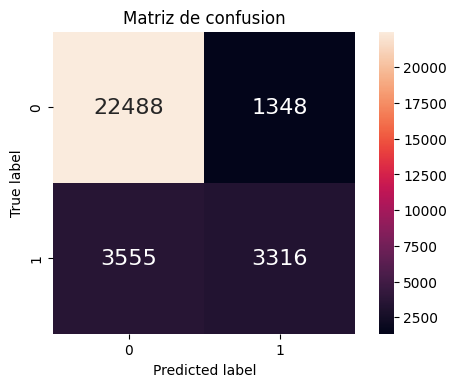

In [17]:
plot_confusion_matrix(resultados_val_dev, clf_tree_con_imputers.predict(datos_val_rellenados_tree))

In [18]:
print(classification_report(resultados_val_dev, clf_tree_con_imputers.predict(datos_val_rellenados_tree)))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     23836
           1       0.71      0.48      0.57      6871

    accuracy                           0.84     30707
   macro avg       0.79      0.71      0.74     30707
weighted avg       0.83      0.84      0.83     30707



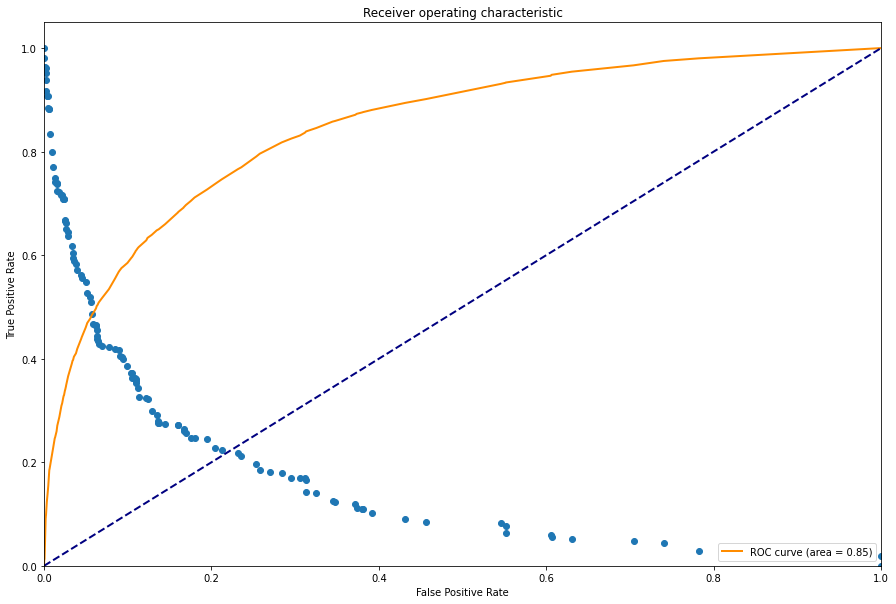

0.8479439159390458

In [19]:
fpr, tpr, thresholds = roc_curve(resultados_val_dev.to_numpy(), clf_tree_con_imputers.predict_proba(datos_val_rellenados_tree)[:, 1])

plot_roc(fpr, tpr, thresholds)
display(roc_auc_score(resultados_val_dev.to_numpy(), clf_tree_con_imputers.predict_proba(datos_val_rellenados_tree)[:, 1]))

Podemos ver que el AUC ROC aumento un poco, y como los arboles de prediccion tienden a overffitear tratamos de reducirle la dimensionalidad.

# Reduccion de dimensionalidad

Nos fijamos cuales son los features mas importantes.

In [23]:
sorted(list(zip(datos_training_tree.columns, clf_tree_con_imputers.feature_importances_)), key=lambda x: -x[1])[:20]

[('humedad_tarde', 0.6283952079489291),
 ('horas_de_sol', 0.10979920886494138),
 ('presion_atmosferica_tarde', 0.105415478825403),
 ('rafaga_viento_max_velocidad', 0.059322149303644385),
 ('mm_lluvia_dia', 0.04396211470278019),
 ('nubosidad_tarde', 0.015286137114140069),
 ('temperatura_temprano', 0.012113737171658095),
 ('direccion_viento_tarde_2', 0.00613770979457995),
 ('humedad_temprano', 0.00413974733328054),
 ('mm_evaporados_agua', 0.0024937438500238452),
 ('barrio_0', 0.0021445564407313847),
 ('temp_min', 0.0018894628888252868),
 ('temp_max', 0.0017966099842697536),
 ('direccion_viento_temprano_2', 0.0016639224026335586),
 ('temperatura_tarde', 0.0009792561874093124),
 ('mes', 0.0008714075785771795),
 ('barrio_1', 0.0008404471395314726),
 ('velocidad_viendo_temprano', 0.0006443135887809286),
 ('velocidad_viendo_tarde', 0.0006118937356182104),
 ('dia', 0.0005463581495288763)]

Podemos ver que a partir de la categoria 'direccion_viento_tarde_2', la importancia de los features es casi despreciable (menos de 0.01), por lo tanto decidimos entrenar de nuevo el modelo con un dataset mas pequeño.

In [5]:
from preprocessing import preprocessing_arbol
datos_training_reducidos_tree, datos_val_reducido_tree = preprocessing_arbol(X_training.copy(), X_val_dev.copy(), resultados_training_tree.copy())
pd.DataFrame(datos_training_reducidos_tree)

,0,1,2,3,4,5,6,7
0,5.855419,59.0,0.000000,4.662774,1018.700012,28.0,12.0,14.8
1,5.800000,62.0,0.000000,3.000000,1005.000000,72.0,26.0,30.0
2,7.200000,71.0,1.000000,5.000000,1008.799988,35.0,23.7,27.1
3,8.739483,62.0,0.000000,4.447522,1007.799988,39.0,23.3,28.6
4,4.483617,61.0,0.000000,5.239149,1016.599976,30.0,3.3,6.3
...,...,...,...,...,...,...,...,...
71644,10.808036,33.0,0.000000,2.859081,1018.099976,35.0,14.7,22.4
71645,9.795808,45.0,0.000000,1.000000,1015.299988,33.0,2.1,7.9
71646,0.900000,66.0,11.800000,7.000000,1020.599976,59.0,10.7,11.6
71647,9.233298,34.0,2.476756,1.000000,1014.200012,96.0,12.7,19.1


Vemos que el nuevo dataframe contiene horas_de_sol, humedad_tarde, mm_lluvia_dia, nubosidad_tarde, presion_atmosferica_tarde, rafaga_de_viento_max_velocidad, temp_min y temperatura_temprano.

Volvemos a entrenar el modelo utilizando este dataset.

In [27]:
params = {'max_depth': np.arange(1, 21), 'min_samples_leaf': np.arange(1, 16)}

clf = DecisionTreeClassifier(random_state=117)

rgscv = RandomizedSearchCV(
    clf, params, n_iter=60, scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True, random_state=117
).fit(datos_training_reducidos_tree, resultados_training_tree)
print(f"Best score: {rgscv.best_score_}")
print(f"Best params {rgscv.best_params_}")

Best score: 0.8512128764523104
Best params {'min_samples_leaf': 14, 'max_depth': 7}


In [28]:
clf_tree_reducido = tree.DecisionTreeClassifier(
        random_state=117, max_depth=7, min_samples_leaf=14)

kfold(clf_tree_reducido, datos_training_reducidos_tree, resultados_training_tree.to_numpy())

fold 0: accuracy score is 0.8442
fold 1: accuracy score is 0.8417
fold 2: accuracy score is 0.8385
fold 3: accuracy score is 0.8375
fold 4: accuracy score is 0.8403
mean test accuracy is: 0.8404


In [6]:
clf_tree_reducido = tree.DecisionTreeClassifier(
        random_state=117, max_depth=7, min_samples_leaf=14)
clf_tree_reducido.fit(datos_training_reducidos_tree, resultados_training_tree.to_numpy())

DecisionTreeClassifier(max_depth=7, min_samples_leaf=14, random_state=117)

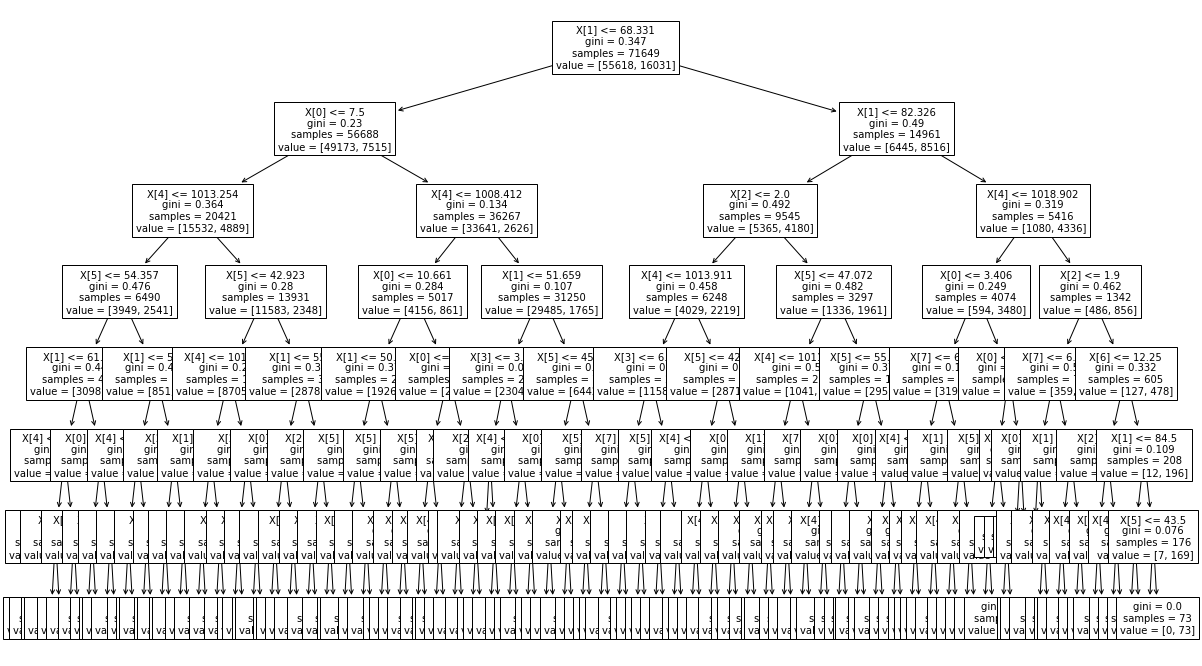

In [29]:
plt.figure(figsize=(20,12))
tree.plot_tree(clf_tree_reducido, fontsize=10)
plt.show()

Realizamos las predicciones.

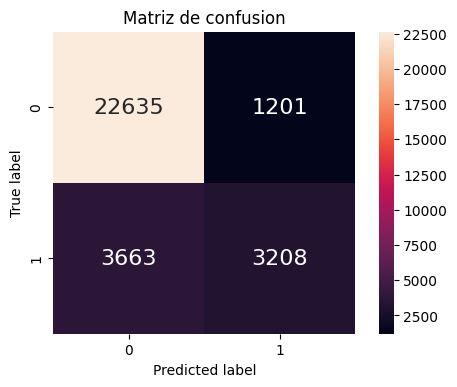

In [10]:
plot_confusion_matrix(resultados_val_dev, clf_tree_reducido.predict(datos_val_reducido_tree))

In [12]:
print(classification_report(resultados_val_dev, clf_tree_reducido.predict(datos_val_reducido_tree)))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     23836
           1       0.73      0.47      0.57      6871

    accuracy                           0.84     30707
   macro avg       0.79      0.71      0.74     30707
weighted avg       0.83      0.84      0.83     30707



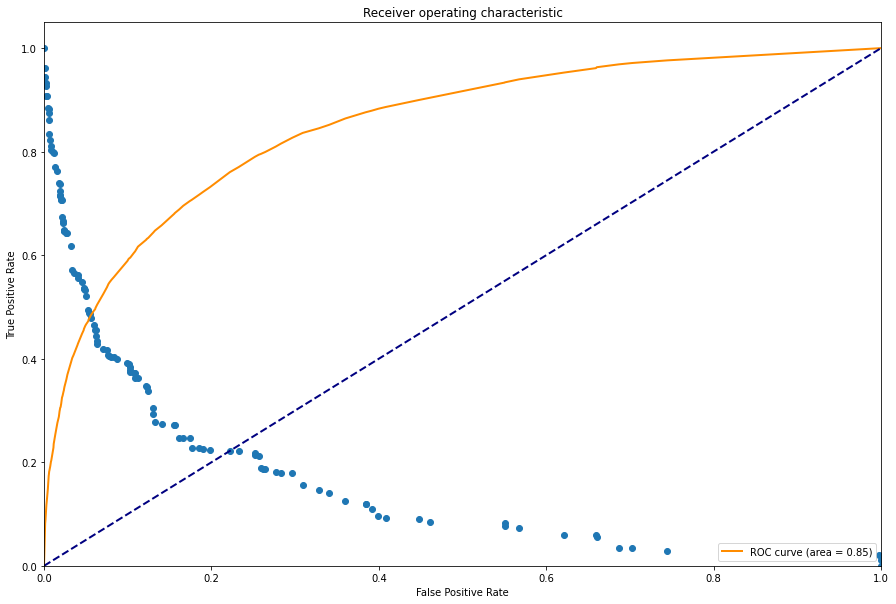

0.8491063033235234

In [13]:
fpr, tpr, thresholds = roc_curve(resultados_val_dev.to_numpy(), clf_tree_reducido.predict_proba(datos_val_reducido_tree)[:, 1])

plot_roc(fpr, tpr, thresholds)
display(roc_auc_score(resultados_val_dev.to_numpy(), clf_tree_reducido.predict_proba(datos_val_reducido_tree)[:, 1]))

Podemos ver que las metricas mejoraron un poco, por lo tanto decidimos que estos seran los features a utilizar en el modelo final.

# Predicciones sobre el holdout

In [14]:
from preprocessing import preprocessing_arbol

_datos_training, datos_test = preprocessing_arbol(X_training.copy(), X_test_holdout, resultados_training_tree)

resultados_test = y_test_holdout.reset_index().drop(columns=['index'])
resultados_test = pd.get_dummies(resultados_test, drop_first=True, columns=['llovieron_hamburguesas_al_dia_siguiente'])

pd.DataFrame(datos_test)

,0,1,2,3,4,5,6,7
0,3.666169,69.0,0.0,5.446039,1023.000000,33.0,7.8,9.5
1,9.962493,31.0,0.0,2.967777,1017.400024,31.0,3.4,11.9
2,13.800000,49.0,0.0,1.000000,1012.200012,31.0,12.7,15.8
3,12.400000,31.0,0.0,6.000000,1011.700012,33.0,19.0,22.1
4,9.200000,47.0,0.0,4.000000,1022.200012,28.0,9.7,13.6
...,...,...,...,...,...,...,...,...
11368,10.692882,32.0,0.0,2.586462,1022.799988,31.0,8.8,14.7
11369,1.012119,94.0,0.0,8.554540,1003.000000,69.0,8.2,12.1
11370,0.000000,64.0,0.0,7.000000,1015.799988,24.0,12.7,16.1
11371,8.400000,58.0,0.0,3.000000,1024.000000,24.0,9.4,13.7


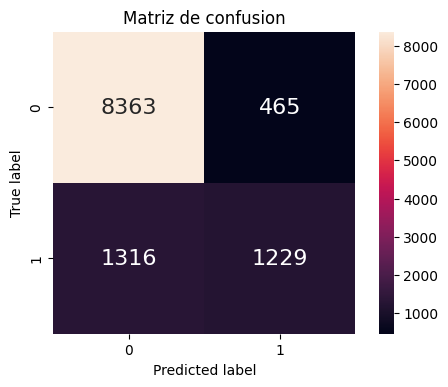

In [15]:
plot_confusion_matrix(resultados_test, clf_tree_reducido.predict(datos_test))

In [16]:
print(classification_report(resultados_test, clf_tree_reducido.predict(datos_test)))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      8828
           1       0.73      0.48      0.58      2545

    accuracy                           0.84     11373
   macro avg       0.79      0.72      0.74     11373
weighted avg       0.83      0.84      0.83     11373



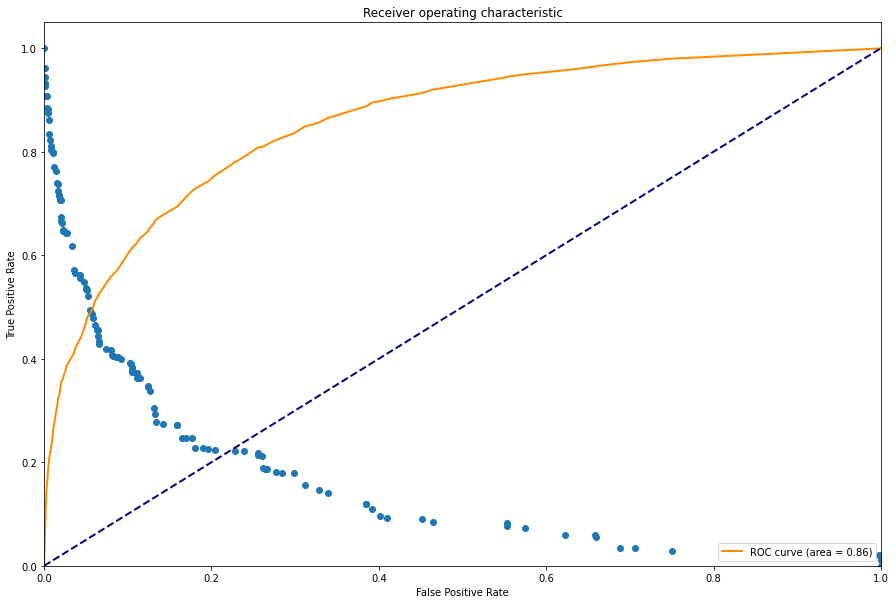

0.8573599762498854

In [17]:
fpr, tpr, thresholds = roc_curve(resultados_test.to_numpy(), clf_tree_reducido.predict_proba(datos_test)[:, 1])

plot_roc(fpr, tpr, thresholds)
display(roc_auc_score(resultados_test.to_numpy(), clf_tree_reducido.predict_proba(datos_test)[:, 1]))

# Predicciones

In [18]:
datos_prediccion = pd.read_csv(
    'https://docs.google.com/spreadsheets/d/1mR_JNN0-ceiB5qV42Ff9hznz0HtWaoPF3B9zNGoNPY8/export?format=csv', low_memory=False
)
datos_prediccion

,barrio,dia,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,id,llovieron_hamburguesas_hoy,mm_evaporados_agua,...,presion_atmosferica_tarde,presion_atmosferica_temprano,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viendo_tarde,velocidad_viendo_temprano
0,Villa General Mitre,2014-12-16,Oestesuroeste,Sursureste,13.4,38.0,51.0,116706,NaN,NaN,...,1010.9,1014.4,suroeste,41.0,26.8,8.9,24.9,20.6,28.0,13.0
1,Nueva Pompeya,2010-10-21,Nornoreste,Estesureste,NaN,39.0,57.0,58831,no,NaN,...,1020.2,1023.8,Norte,28.0,23.3,5.0,21.5,14.7,11.0,6.0
2,Constitución,2013-04-09,Estesureste,Oestenoroeste,3.6,73.0,90.0,31981,si,2.4,...,1024.3,1026.7,Oestenoroeste,24.0,22.0,15.6,20.7,16.7,6.0,15.0
3,Agronomía,2016-02-05,Sureste,Sureste,NaN,34.0,47.0,2533,no,NaN,...,1015.8,1018.3,Sureste,30.0,29.9,14.2,27.0,20.0,11.0,15.0
4,Balvanera,2012-06-05,suroeste,Noroeste,NaN,77.0,87.0,7270,no,2.0,...,1007.6,1006.0,suroeste,39.0,11.5,5.5,11.2,7.0,20.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29087,Parque Chas,2013-04-24,suroeste,Oestenoroeste,NaN,71.0,77.0,73456,no,NaN,...,1018.9,1021.2,Oeste,37.0,19.8,9.8,17.3,12.8,9.0,13.0
29088,Belgrano,2015-10-30,Norte,Noreste,NaN,37.0,64.0,14471,no,NaN,...,1017.9,1021.8,Nornoreste,41.0,29.3,15.6,27.8,20.2,15.0,28.0
29089,Villa Crespo,2011-08-09,Nornoreste,Norte,10.1,31.0,77.0,106482,no,3.2,...,1011.1,1016.3,suroeste,41.0,19.8,5.5,18.6,11.1,20.0,11.0
29090,Caballito,2017-04-25,Nornoreste,Norte,NaN,81.0,90.0,21057,no,NaN,...,1008.2,1014.6,Nornoreste,39.0,25.4,17.8,22.0,19.5,33.0,15.0


In [19]:
_datos_training, X = preprocessing_arbol(X_training.copy(), datos_prediccion, resultados_training_tree)
predicciones = clf_tree_reducido.predict(X)

predicciones = pd.DataFrame(predicciones).rename(columns= {0:'llovieron_hamburguesas_al_dia_siguiente'})
predicciones.replace(0, 'no', inplace= True)
predicciones.replace(1, 'si', inplace= True)
predicciones

,llovieron_hamburguesas_al_dia_siguiente
0,no
1,no
2,no
3,no
4,si
...,...
29087,no
29088,no
29089,no
29090,no


In [20]:
predicciones.to_csv("Arbol_de_Decision.csv")